In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('marketing_data.csv')

In [3]:
data.head()

,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2240 non-null   int64 
 1   YearBirth            2240 non-null   int64 
 2   Education            2240 non-null   object
 3   MaritalStatus        2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   DtCustomer           2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProducts      2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [5]:
data.isna().sum()

id                      0
YearBirth               0
Education               0
MaritalStatus           0
Income                 24
Kidhome                 0
Teenhome                0
DtCustomer              0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProducts         0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [6]:
# data['Income']=data['Income'].fillna(method='ffill')

### Clean Income Column

In [7]:
data.head()

,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [8]:
data['Income'] = data['Income'].replace('[\$,]','',regex=True).astype('float')

In [9]:
data[data['Income']>200000]

,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
527,9432,1977,Graduation,Together,666666.0,1,0,6/2/13,23,9,...,3,6,0,0,0,0,0,0,0,SA


In [10]:
data['Income']=data['Income'].fillna(data['Income'].mean())

In [11]:
data['Income'].describe()

count      2240.000000
mean      52247.251354
std       25037.797168
min        1730.000000
25%       35538.750000
50%       51741.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

In [12]:
data.head()

,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


### Check Outliers

<Axes: ylabel='Income'>

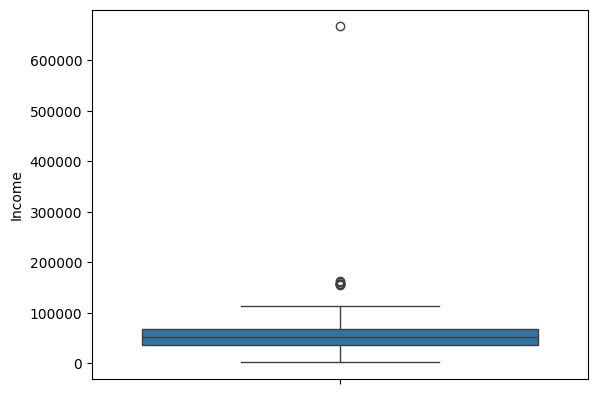

In [13]:
plt.figure()
sns.boxplot(y='Income',data=data)

In [14]:
data['Income'].describe()

count      2240.000000
mean      52247.251354
std       25037.797168
min        1730.000000
25%       35538.750000
50%       51741.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

In [15]:
data.shape

(2240, 28)

### Remove Outliers

In [16]:
data = data[data['Income']<200000]

In [17]:
data['Income'].describe()

count      2239.000000
mean      51972.834762
std       21410.605416
min        1730.000000
25%       35533.500000
50%       51717.000000
75%       68277.500000
max      162397.000000
Name: Income, dtype: float64

In [18]:
data.shape

(2239, 28)

In [19]:
data['Age'] = 2024-data['YearBirth']

In [20]:
data.columns

Index(['id', 'YearBirth', 'Education', 'MaritalStatus', 'Income', 'Kidhome',
       'Teenhome', 'DtCustomer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Age'],
      dtype='object')

In [21]:
data.head()

,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,1,0,0,0,0,0,1,0,SP,54
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,5,0,0,0,0,1,1,0,CA,63
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,2,0,0,0,0,0,0,0,US,66
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,7,0,0,0,0,0,0,0,AUS,57
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,7,1,0,0,0,0,1,0,SP,35


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2239 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2239 non-null   int64  
 1   YearBirth            2239 non-null   int64  
 2   Education            2239 non-null   object 
 3   MaritalStatus        2239 non-null   object 
 4   Income               2239 non-null   float64
 5   Kidhome              2239 non-null   int64  
 6   Teenhome             2239 non-null   int64  
 7   DtCustomer           2239 non-null   object 
 8   Recency              2239 non-null   int64  
 9   MntWines             2239 non-null   int64  
 10  MntFruits            2239 non-null   int64  
 11  MntMeatProducts      2239 non-null   int64  
 12  MntFishProducts      2239 non-null   int64  
 13  MntSweetProducts     2239 non-null   int64  
 14  MntGoldProducts      2239 non-null   int64  
 15  NumDealsPurchases    2239 non-null   int64 

<Axes: ylabel='Age'>

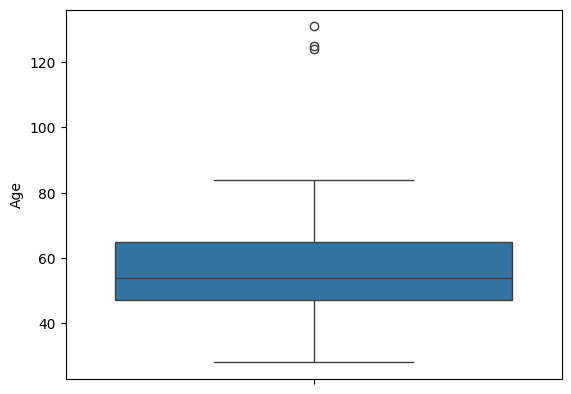

In [23]:
plt.figure()
sns.boxplot(y='Age', data=data)

In [24]:
data = data[data['Age']<100]

In [25]:
data.shape

(2236, 29)

<Axes: ylabel='Income'>

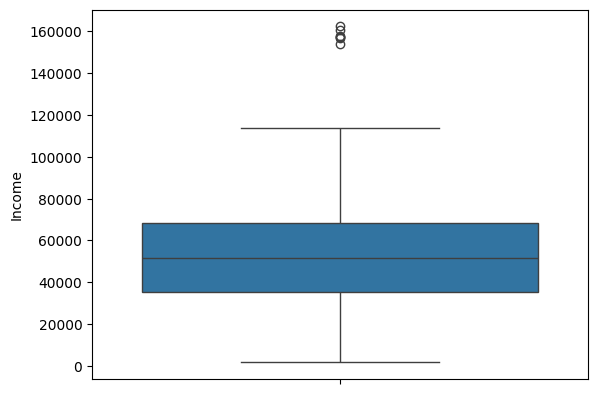

In [26]:
sns.boxplot(y='Income',data=data)

In [27]:
data['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

<Axes: xlabel='Education', ylabel='Income'>

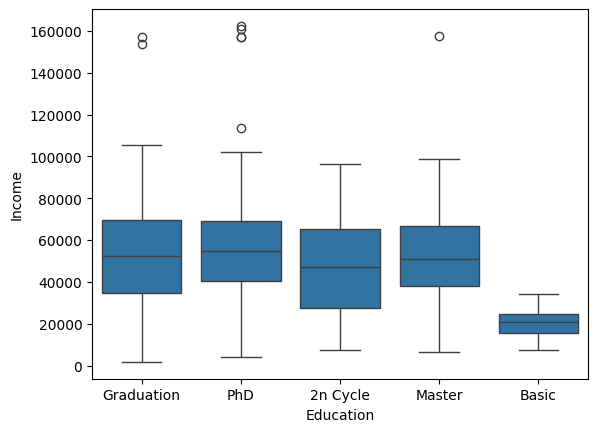

In [28]:
sns.boxplot(x='Education', y='Income', data=data)

In [29]:
data.corr()

ValueError: could not convert string to float: 'Graduation'

In [30]:
numeric_data=data.select_dtypes(include='number')

In [31]:
numeric_data.shape

(2236, 25)

In [32]:
numeric_data

,id,YearBirth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Age
0,1826,1970,84835.0,0,0,0,189,104,379,111,...,6,1,0,0,0,0,0,1,0,54
1,1,1961,57091.0,0,0,0,464,5,64,7,...,7,5,0,0,0,0,1,1,0,63
2,10476,1958,67267.0,0,1,0,134,11,59,15,...,5,2,0,0,0,0,0,0,0,66
3,1386,1967,32474.0,1,1,0,10,0,1,0,...,2,7,0,0,0,0,0,0,0,57
4,5371,1989,21474.0,1,0,0,6,16,24,11,...,2,7,1,0,0,0,0,1,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,66476.0,0,1,99,372,18,126,47,...,11,4,0,0,0,0,0,0,0,48
2236,5263,1977,31056.0,1,0,99,5,10,13,3,...,3,8,0,0,0,0,0,0,0,47
2237,22,1976,46310.0,1,0,99,185,2,88,15,...,5,8,0,0,0,0,0,0,0,48
2238,528,1978,65819.0,0,0,99,267,38,701,149,...,10,3,0,0,0,0,0,0,0,46


In [33]:
numeric_data.corr()

,id,YearBirth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Age
id,1.000000,0.002659,0.000916,0.001656,-0.003052,-0.046300,-0.020726,0.007247,-0.002274,-0.022903,...,-0.013613,-0.008256,-0.035823,-0.025150,-0.004916,-0.021392,-0.014970,-0.021596,0.031580,-0.002659
YearBirth,0.002659,1.000000,-0.198889,0.233894,-0.363172,-0.019396,-0.162809,-0.013657,-0.030729,-0.042359,...,-0.139237,0.117498,0.061107,-0.064261,0.015411,-0.008146,-0.007621,0.018557,-0.004450,-1.000000
Income,0.000916,-0.198889,1.000000,-0.510263,0.034376,0.007963,0.685944,0.504859,0.684170,0.518381,...,0.627943,-0.646426,-0.015186,0.217743,0.394258,0.325288,0.104012,0.160990,-0.027912,0.198889
Kidhome,0.001656,0.233894,-0.510263,1.000000,-0.035339,0.007964,-0.496166,-0.372442,-0.436901,-0.387404,...,-0.500192,0.447626,0.014739,-0.161686,-0.204918,-0.172435,-0.081760,-0.080005,0.036336,-0.233894
Teenhome,-0.003052,-0.363172,0.034376,-0.035339,1.000000,0.016746,0.005047,-0.176117,-0.261171,-0.204177,...,0.050177,0.134636,-0.042949,0.038680,-0.190383,-0.140426,-0.015715,-0.154941,0.007553,0.363172
Recency,-0.046300,-0.019396,0.007963,0.007964,0.016746,1.000000,0.016321,-0.003717,0.023446,0.001314,...,0.000771,-0.021850,-0.033095,0.018779,0.000844,-0.019367,-0.001811,-0.198781,0.005361,0.019396
MntWines,-0.020726,-0.162809,0.685944,-0.496166,0.005047,0.016321,1.000000,0.388472,0.561886,0.398956,...,0.642313,-0.320287,0.062103,0.373491,0.471949,0.354328,0.206031,0.247280,-0.035974,0.162809
MntFruits,0.007247,-0.013657,0.504859,-0.372442,-0.176117,-0.003717,0.388472,1.000000,0.542030,0.594415,...,0.463136,-0.417405,0.014945,0.010363,0.211996,0.195351,-0.009717,0.125854,-0.002813,0.013657
MntMeatProducts,-0.002274,-0.030729,0.684170,-0.436901,-0.261171,0.023446,0.561886,0.542030,1.000000,0.567813,...,0.479983,-0.539183,0.018250,0.102981,0.372173,0.310053,0.043060,0.236548,-0.020750,0.030729
MntFishProducts,-0.022903,-0.042359,0.518381,-0.387404,-0.204177,0.001314,0.398956,0.594415,0.567813,1.000000,...,0.459997,-0.445729,0.000302,0.016797,0.198112,0.260866,0.002555,0.111325,-0.018842,0.042359


<Axes: >

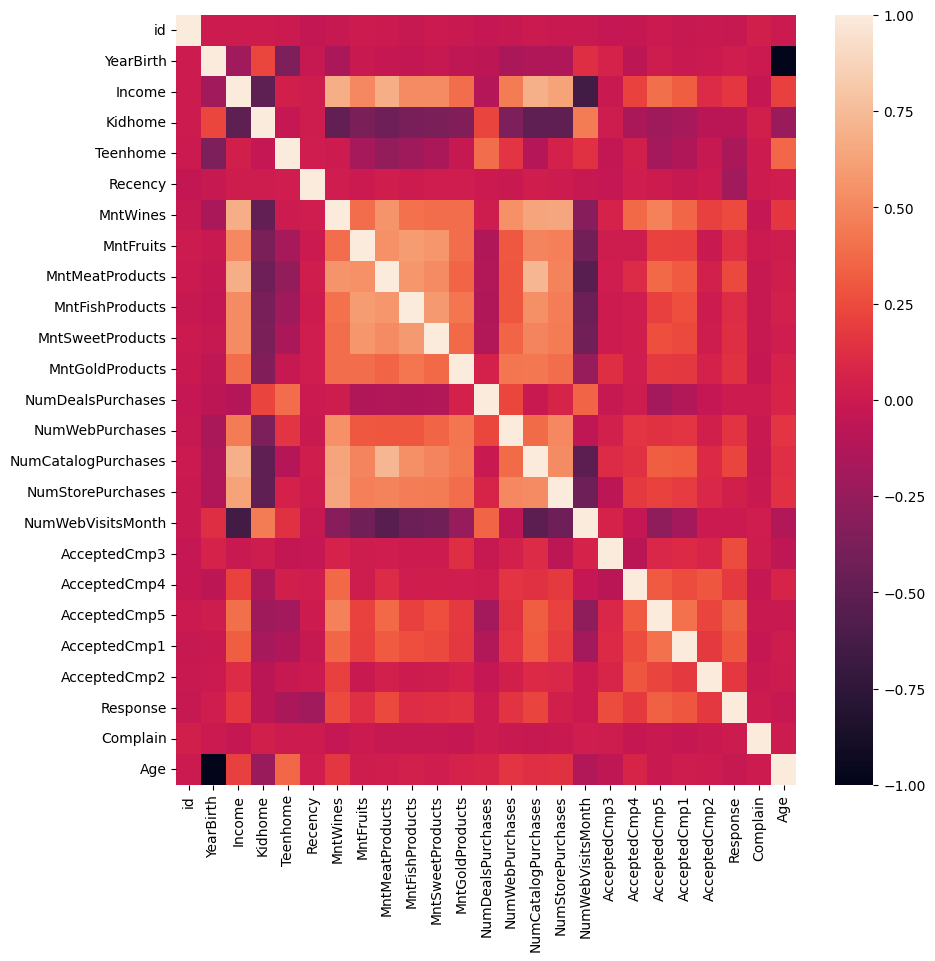

In [34]:
plt.figure(figsize=(10,10))
#HeatMap or heatMatrix shows correlation across all numerical variables
sns.heatmap(data=numeric_data.corr())

## Purchasing behavior by education and income

In [35]:
list(data.columns)

['id',
 'YearBirth',
 'Education',
 'MaritalStatus',
 'Income',
 'Kidhome',
 'Teenhome',
 'DtCustomer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProducts',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response',
 'Complain',
 'Country',
 'Age']

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


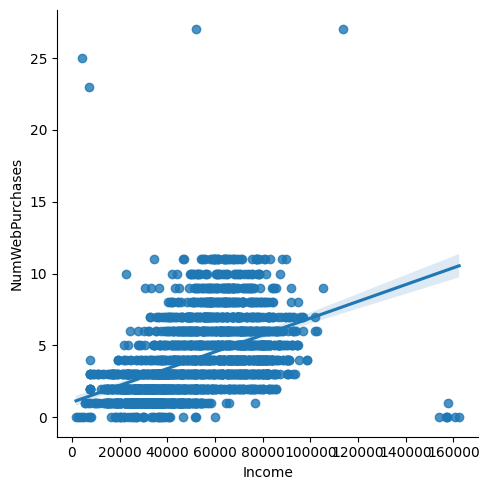

In [36]:
sns.lmplot(x='Income',y='NumWebPurchases',data=data)

### Marketing Purchase

In [37]:
marketing_purchase = ['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']

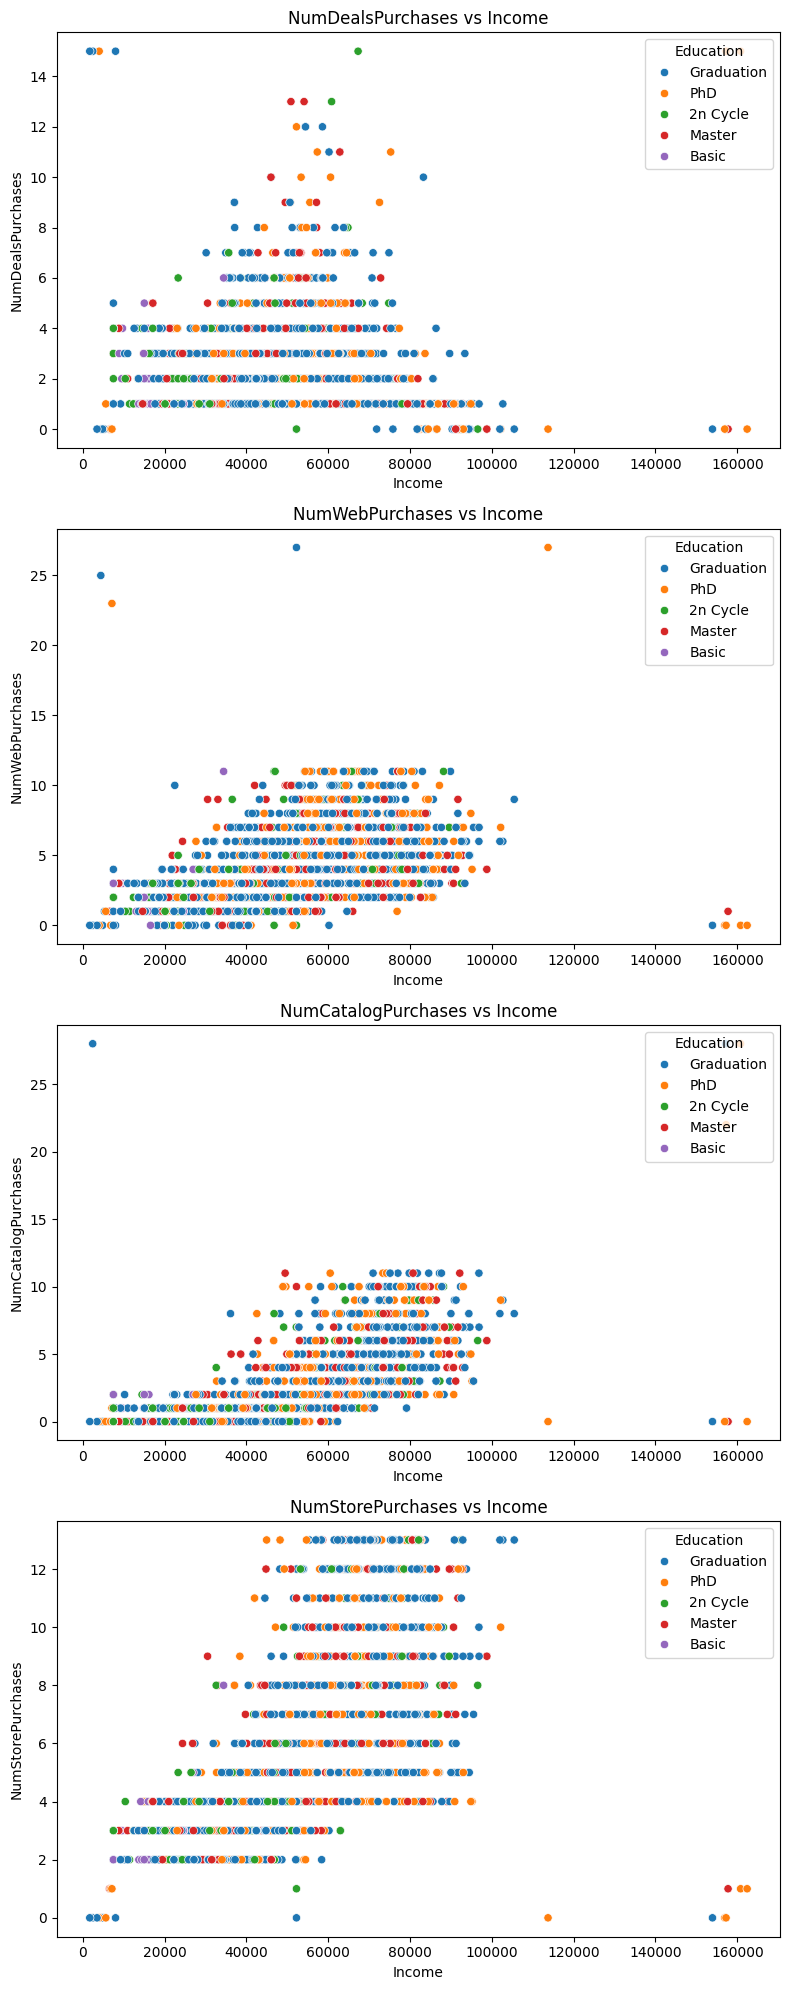

In [38]:
# create subplots
fig, axes = plt.subplots(nrows=len(marketing_purchase), ncols=1, figsize=(8,20))
for i,purchase in enumerate(marketing_purchase):
    # plot scatterplotwith hue
    sns.scatterplot(data=data,x='Income',y=purchase, ax=axes[i], hue='Education')
    axes[i].set_title(f'{marketing_purchase[i]} vs Income')
    axes[i].set_xlabel('Income')
    axes[i].set_ylabel(purchase)
    axes[i].legend(title='Education', loc='upper right')

plt.tight_layout()

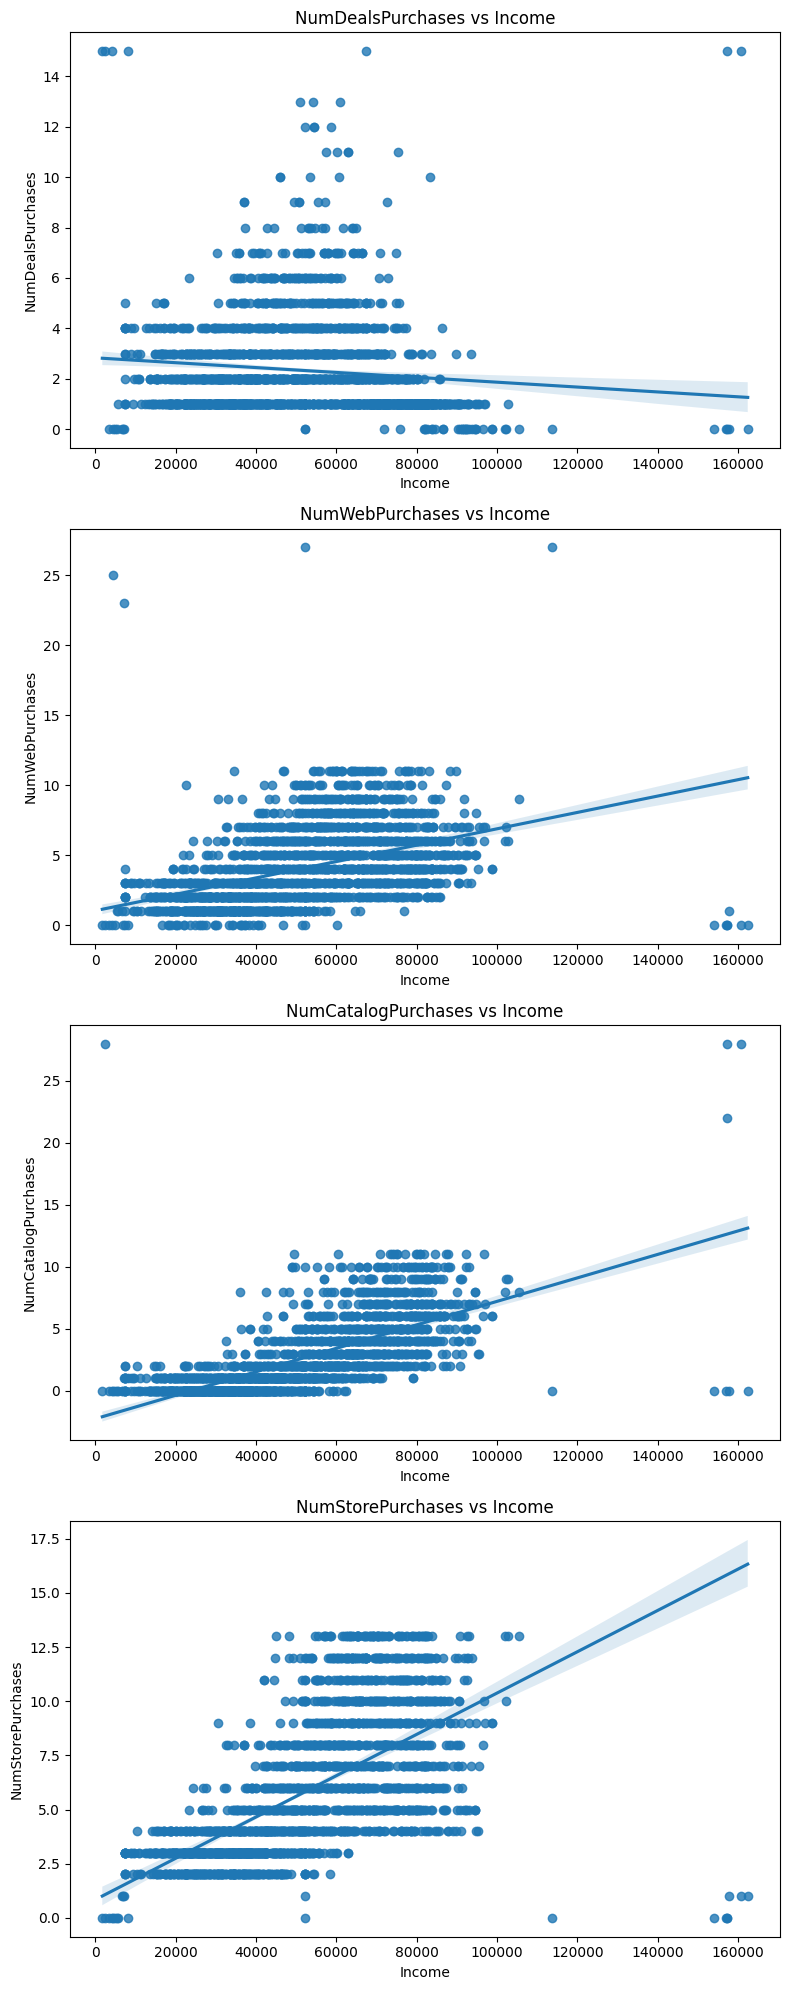

In [39]:
# create subplots
fig, axes = plt.subplots(nrows=len(marketing_purchase), ncols=1, figsize=(8,20))
for i,purchase in enumerate(marketing_purchase):
    # plot scatterplotwith hue
    sns.regplot(data=data,x='Income',y=purchase, ax=axes[i])
    axes[i].set_title(f'{marketing_purchase[i]} vs Income')
    axes[i].set_xlabel('Income')
    axes[i].set_ylabel(purchase)
    # axes[i].legend(title='Education', loc='upper right')

plt.tight_layout()

In [40]:
data['total_purchases'] = data['NumDealsPurchases']+data['NumWebPurchases']+data['NumCatalogPurchases']+data['NumStorePurchases']

Text(0.5, 1.0, 'Purchase Behaviorby income')

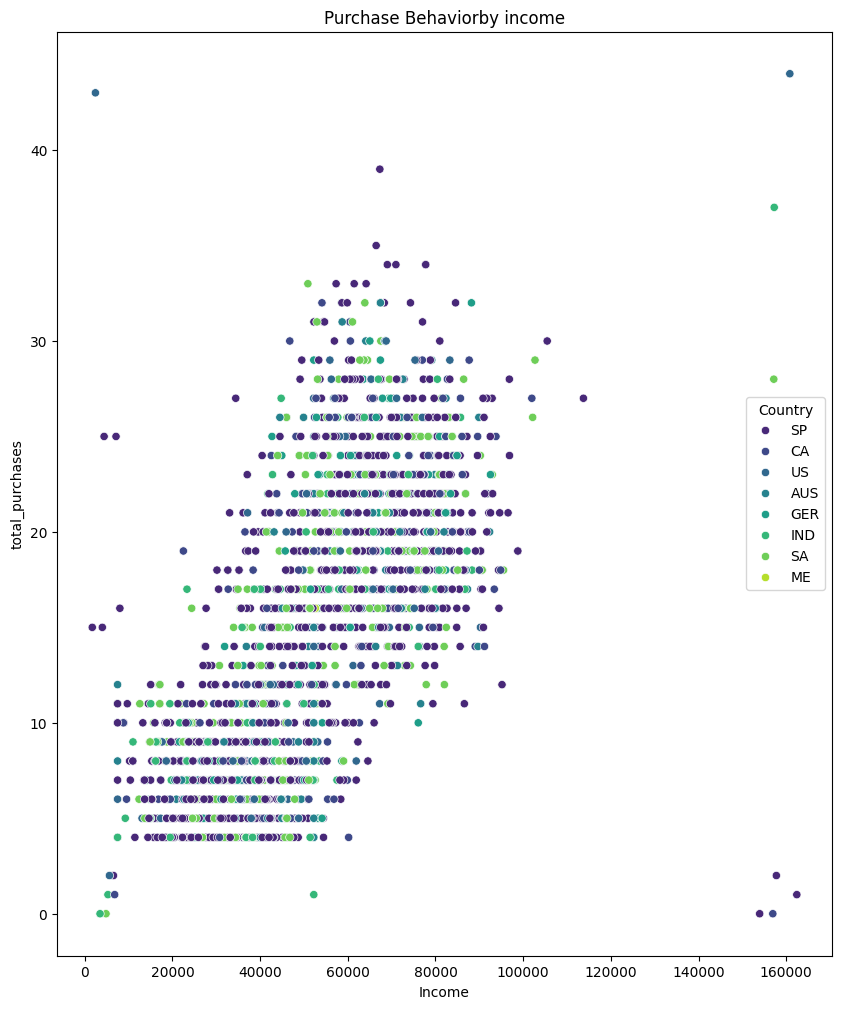

In [42]:
plt.figure(figsize=(10,12))
# ScatterPlot of total purchases vs income
sns.scatterplot(y=data['total_purchases'], x=data['Income'], hue=data['Country'],palette='viridis')
plt.title('Purchase Behaviorby income')

Text(0.5, 1.0, 'Purchase Behaviorby income')

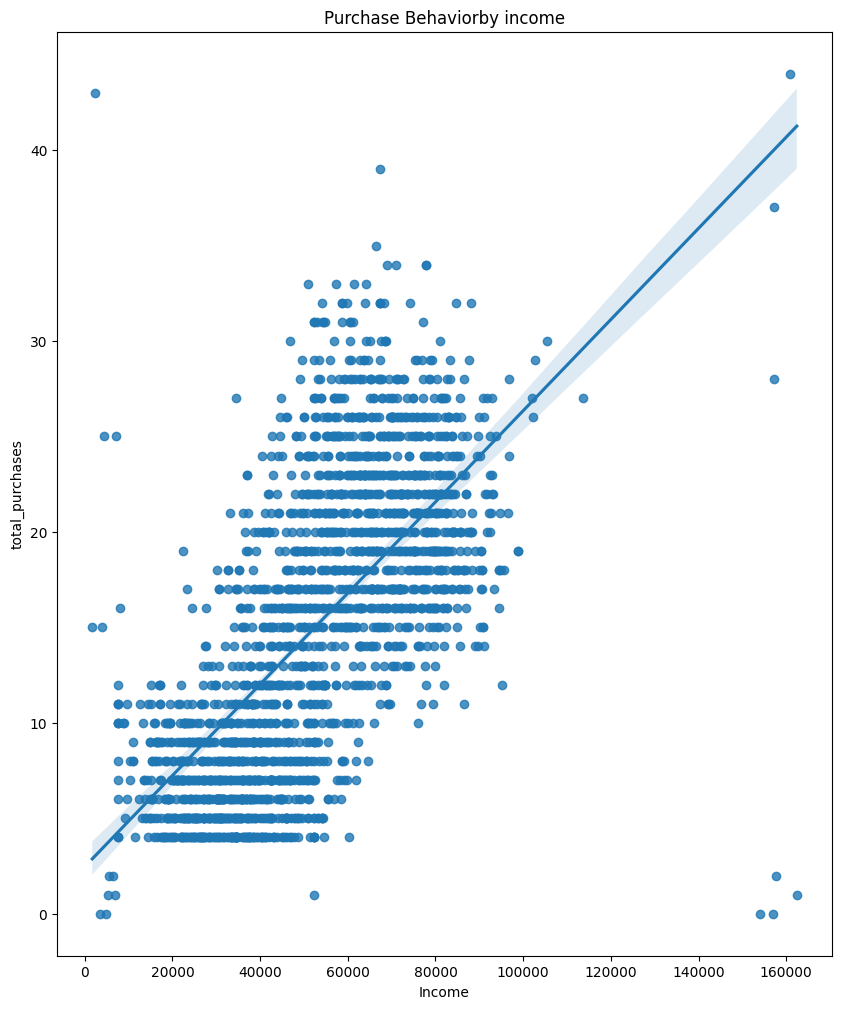

In [45]:
plt.figure(figsize=(10,12))
# ScatterPlot of total purchases vs income
sns.regplot(y=data['total_purchases'], x=data['Income'])
plt.title('Purchase Behaviorby income')

In [48]:
data['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11168\669630611.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


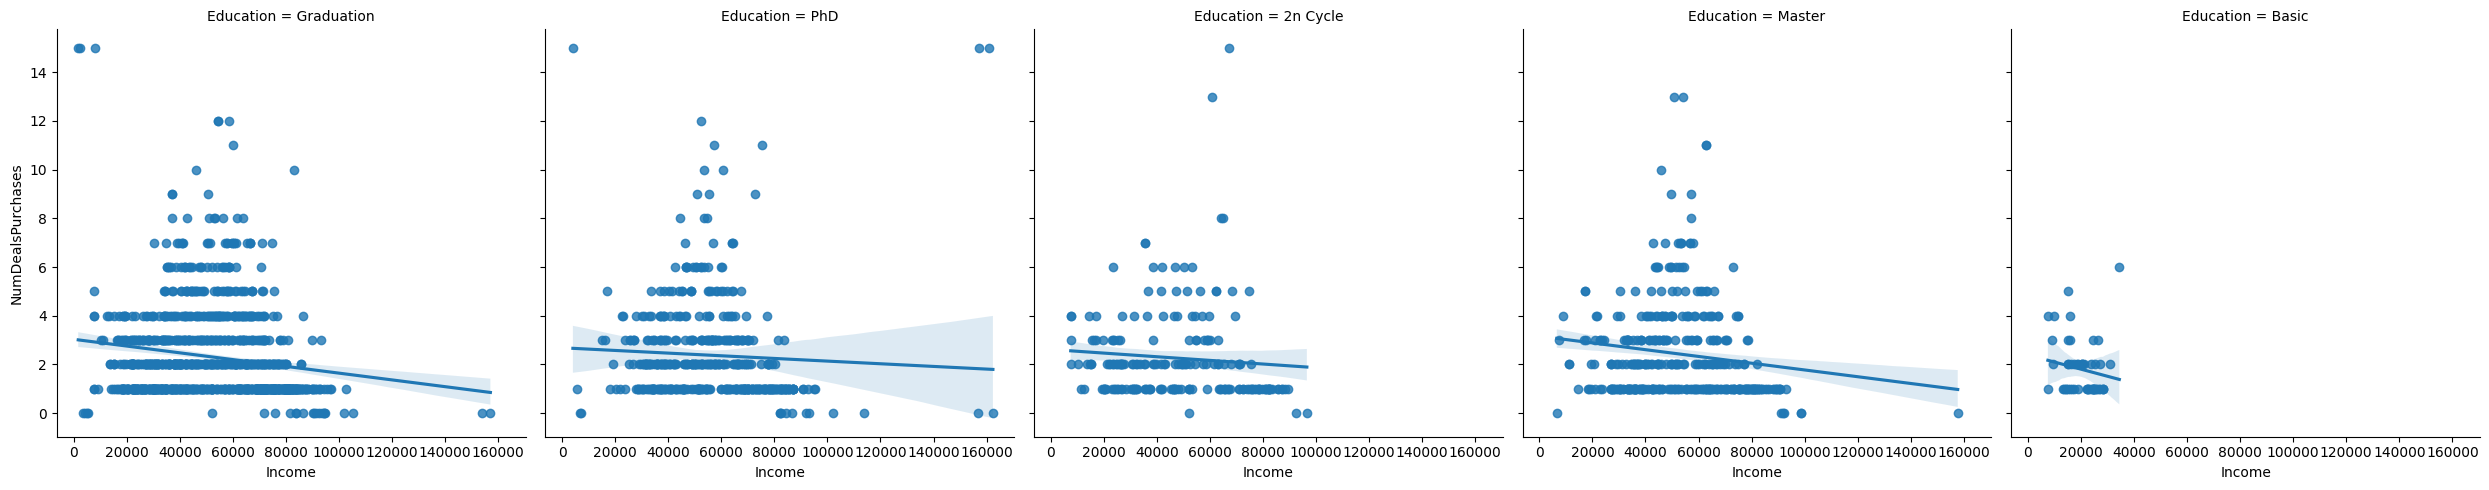

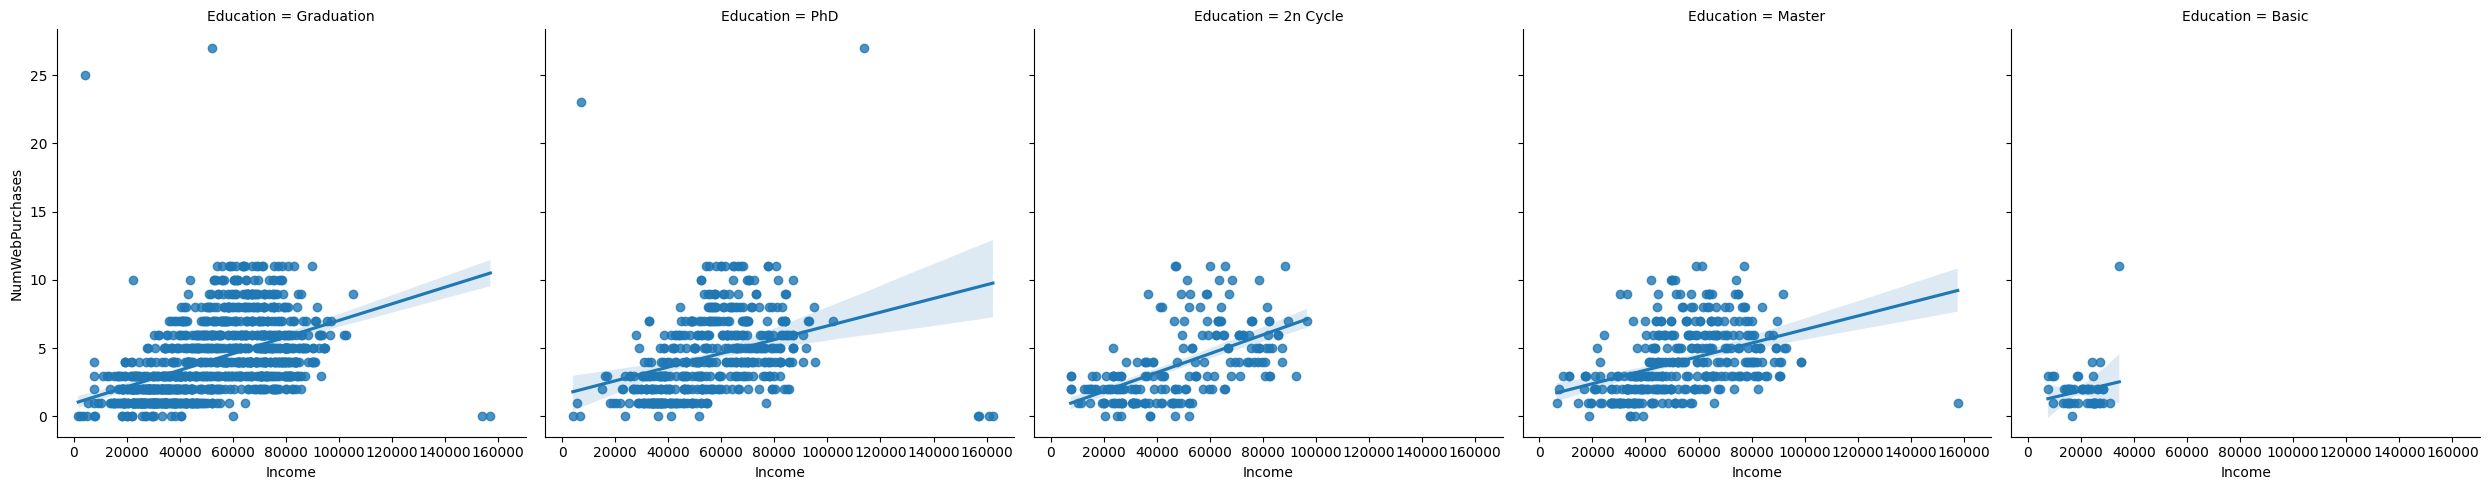

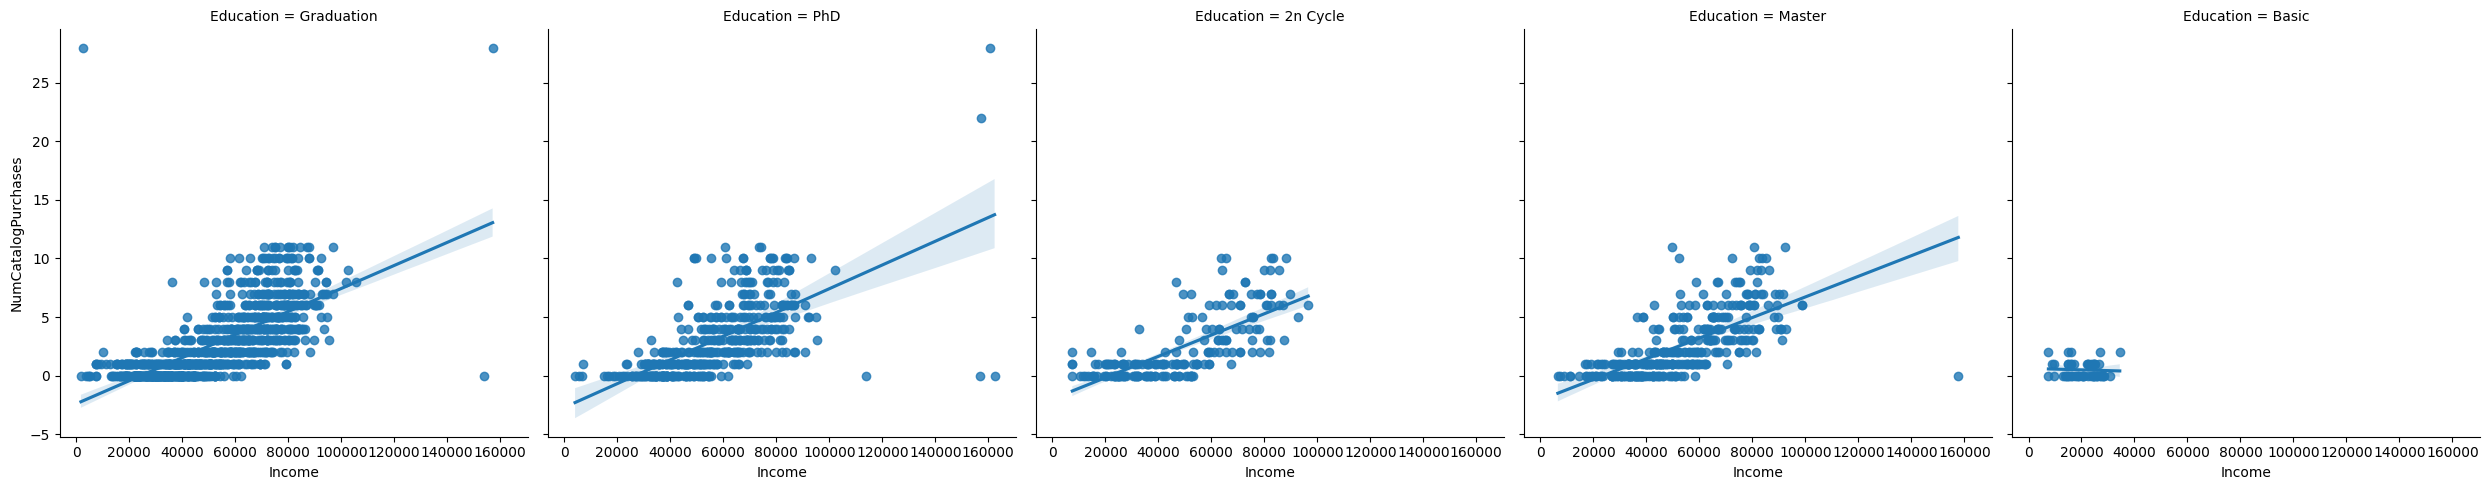

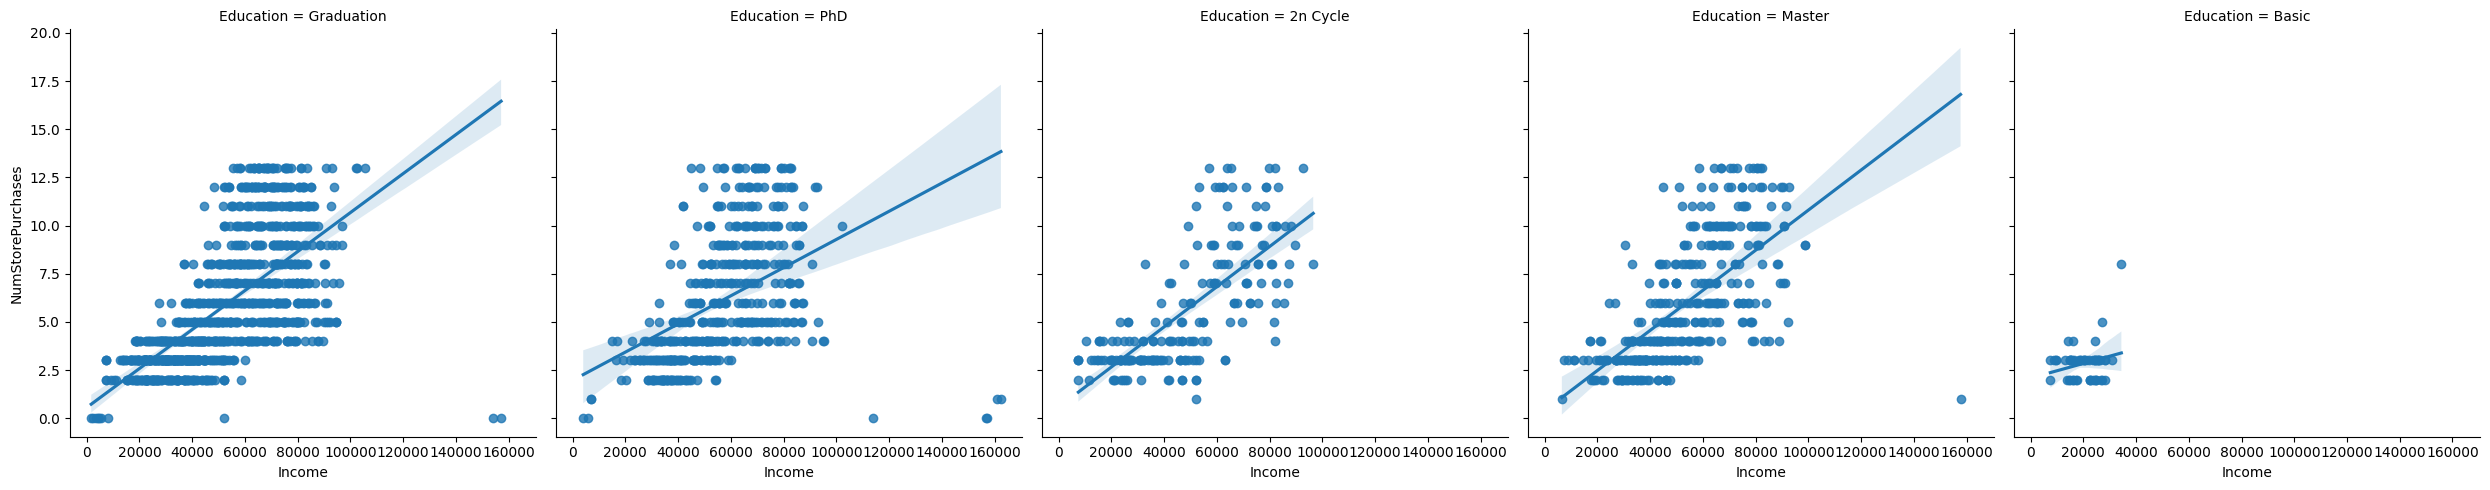

In [49]:
# Create subplots
for i,purchase in enumerate(marketing_purchase):
    # plot scatterplot with hue
    sns.lmplot(data=data, x='Income' ,y=purchase, col='Education')
    axes[i].set_title(f'{marketing_purchase[i]} vs Income')
    axes[i].set_xlabel('Income')
    axes[i].set_ylabel(purchase)

plt.tight_layout()

In [50]:
data.columns

Index(['id', 'YearBirth', 'Education', 'MaritalStatus', 'Income', 'Kidhome',
       'Teenhome', 'DtCustomer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Age',
       'total_purchases'],
      dtype='object')

In [51]:
data['Age']

0       54
1       63
2       66
3       57
4       35
        ..
2235    48
2236    47
2237    48
2238    46
2239    55
Name: Age, Length: 2236, dtype: int64

In [53]:
data['Age'].head(10)

0    54
1    63
2    66
3    57
4    35
5    66
6    70
7    57
8    70
9    70
Name: Age, dtype: int64

In [54]:
data['Age'].unique()

array([54, 63, 66, 57, 35, 70, 77, 45, 65, 43, 55, 47, 64, 58, 48, 59, 68,
       49, 53, 38, 52, 50, 34, 37, 40, 56, 69, 41, 51, 46, 72, 62, 60, 42,
       61, 67, 44, 79, 75, 76, 71, 78, 39, 32, 80, 73, 36, 74, 30, 31, 33,
       28, 29, 81, 83, 84], dtype=int64)

In [55]:
len(data['Age'].unique())

56

In [56]:
# function that breaks up each age into group
def age_group(age):
    if 18<=age <=35:
        return '18 to 35'
    elif 36<=age<=50:
        return '36 to 50'
    elif 51<=age<=70:
        return '51 to 70'
    else:
        return '71 and older'

# appplying the function to dataaframe
data['age_group'] = data['Age'].apply(age_group)

In [57]:
data['age_group']

0       51 to 70
1       51 to 70
2       51 to 70
3       51 to 70
4       18 to 35
          ...   
2235    36 to 50
2236    36 to 50
2237    36 to 50
2238    36 to 50
2239    51 to 70
Name: age_group, Length: 2236, dtype: object

In [58]:
data.shape

(2236, 31)

In [59]:
data[['Age','age_group']]

,Age,age_group
0,54,51 to 70
1,63,51 to 70
2,66,51 to 70
3,57,51 to 70
4,35,18 to 35
...,...,...
2235,48,36 to 50
2236,47,36 to 50
2237,48,36 to 50
2238,46,36 to 50


In [62]:
data.groupby('age_group')['Age'].count().reset_index()

,age_group,Age
0,18 to 35,91
1,36 to 50,755
2,51 to 70,1124
3,71 and older,266


Text(0, 0.5, 'Purchase Count')

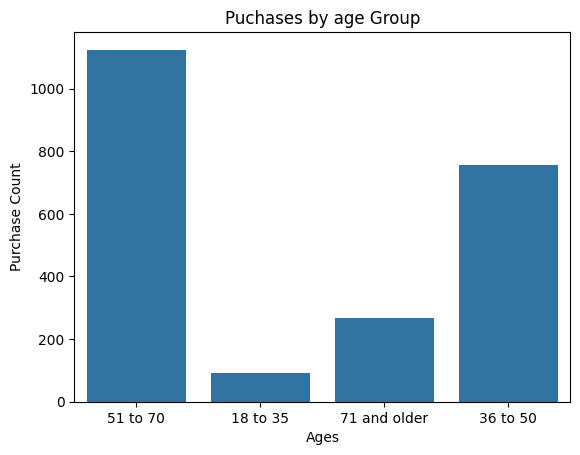

In [63]:
sns.countplot(x='age_group', data=data)
plt.title('Puchases by age Group')
plt.xlabel('Ages')
plt.ylabel('Purchase Count')

Text(0, 0.5, 'Purchase Count')

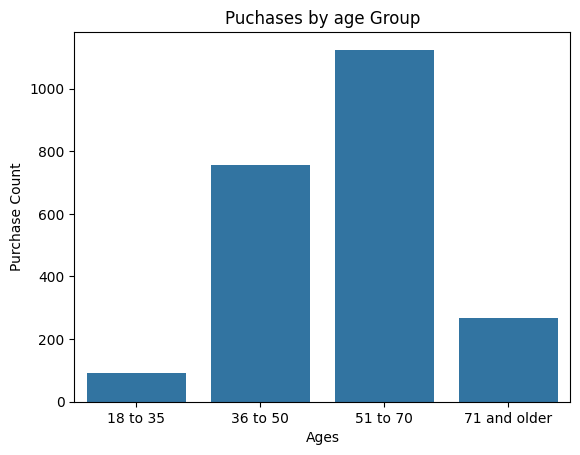

In [65]:
sns.countplot(x='age_group', data=data, order=['18 to 35','36 to 50','51 to 70','71 and older'])
plt.title('Puchases by age Group')
plt.xlabel('Ages')
plt.ylabel('Purchase Count')

In [66]:
data.columns

Index(['id', 'YearBirth', 'Education', 'MaritalStatus', 'Income', 'Kidhome',
       'Teenhome', 'DtCustomer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Age',
       'total_purchases', 'age_group'],
      dtype='object')

In [69]:
data[['NumCatalogPurchases','NumDealsPurchases','NumStorePurchases','NumWebPurchases']]

,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases
0,4,1,6,4
1,3,1,7,7
2,2,1,5,3
3,0,1,2,1
4,1,2,2,3
...,...,...,...,...
2235,2,2,11,5
2236,0,1,3,1
2237,1,2,5,6
2238,4,1,10,5


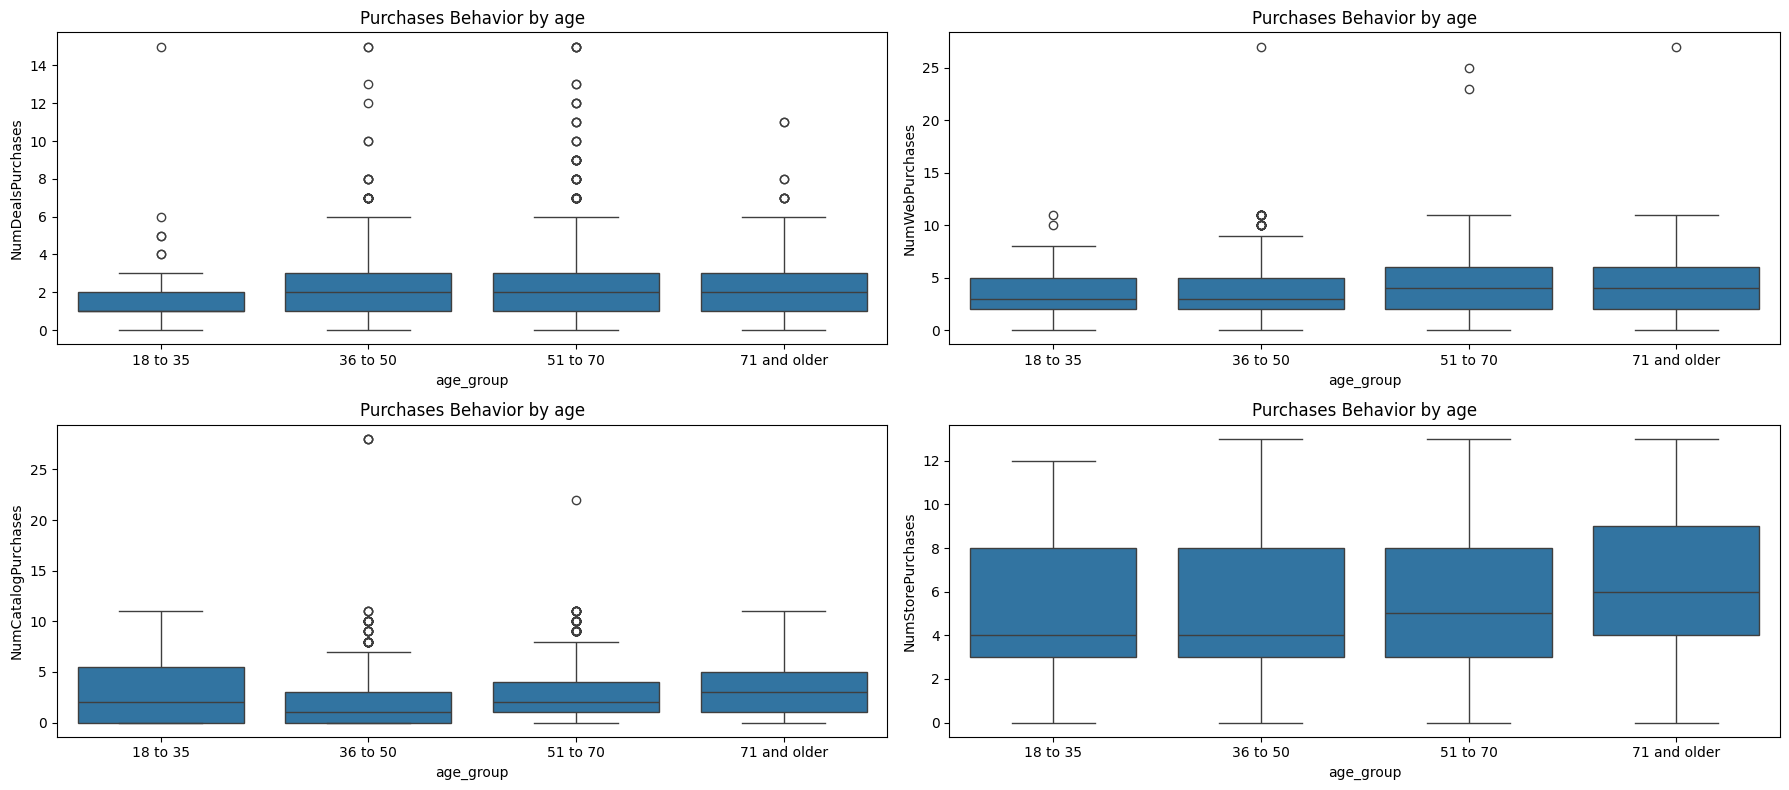

In [71]:
num_purchases_cols = ['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']
plot=0
fig = plt.figure(figsize=(18,8))

# Looping throught the length of the list
for i in range(len(num_purchases_cols)):
    plot+=1
    # setting up the subplots
    ax=plt.subplot(2,2,plot)
    # scatterplot of num purchases vs age
    sns.boxplot(x=data['age_group'], y=data[num_purchases_cols[i]], order=['18 to 35','36 to 50','51 to 70','71 and older'])
    plt.title('Purchases Behavior by age')

plt.tight_layout()